In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
#Import dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (569, 30)
y.shape = (569,)


In [5]:
# Splitting data for test and train parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Training neural network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)

In [8]:
# Accuracy rating
train_acc = clf.score(X_train_scaled, y_train)
test_acc = clf.score(X_test_scaled, y_test)

print("train accuracy = {:.3%}".format(train_acc))
print("test accuracy = {:.3%}".format(test_acc))

train accuracy = 99.341%
test accuracy = 98.246%


In [9]:
# Loading dataset
def load_dataset():
    fn = os.path.join(path, 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])

    fn = os.path.join(path, 'test_signs.h5')
    test_dataset = h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    y_train = y_train.reshape((y_train.shape[0],))
    y_test = y_test.reshape((y_test.shape[0],))
    
    return X_train, y_train, X_test, y_test, classes

In [10]:
#Importing training dataset and splitting data
path = 'Lab 9 train test' 
X_train, y_train, X_test, y_test, classes = load_dataset()

In [11]:
# Normalisation and turning pictures to vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

In [12]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [13]:
print("number of training examples =", X_train_scaled.shape[0])
print("number of test examples =", X_test_scaled.shape[0])
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

number of training examples = 1080
number of test examples = 120
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


In [14]:
# Training neural network
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
clf.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [15]:
# Acuracy rating
train_acc = accuracy_score(y_train, clf.predict(X_train_scaled))
test_acc = accuracy_score(y_test, clf.predict(X_test_scaled))

print("train accuracy = {:.3%}".format(train_acc))
print("test accuracy = {:.3%}".format(test_acc))

train accuracy = 100.000%
test accuracy = 89.167%


In [16]:
# Testing examples
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None:
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows * n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            index = n_rows * i + j
            ax = plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[indices[index]])
            if y is not None:
                plt.title(str(y[indices[index]]))
            plt.axis('off')
    plt.tight_layout(h_pad=1)

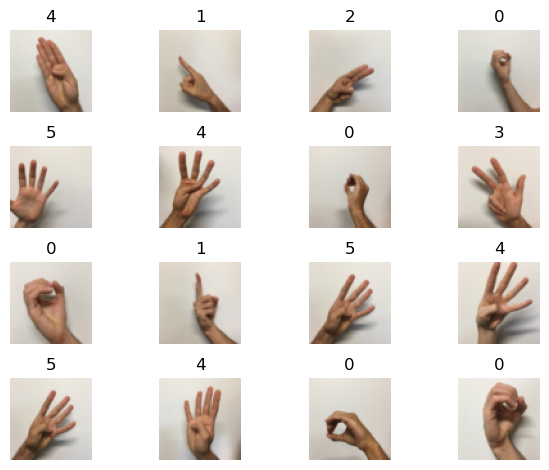

In [17]:
# Visualisation
plt.figure()
predicted = clf.predict(X_test_scaled)
display_samples_in_grid(X_test, n_rows=4, y=predicted)
plt.gcf().canvas.manager.set_window_title('Predictions')
plt.show()

In [25]:
#Compare with SVM
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))
#I guess, i got this low results of test accuracy because of overfitting. Lets try to change some parameters.


train accuracy= 100.000%
test accuracy= 65.000%


In [ ]:
#Compare with SVM
from sklearn.svm import SVC
clf = SVC(C=8, kernel='rbf', gamma='scale').fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))


train accuracy= 100.000%
test accuracy= 95.000%
